In [2]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import random
import math

(1.0, 1.0)
(2.0, 2.0)
(3.0, 3.1409800000000008)
(4.0, 4.195919999999999)
(5.0, 4.92368)
(6.0, 5.26192)
(7.0, 5.18848)
(8.0, 4.76288)
(9.0, 4.032)
(10.0, 3.13344)
(11.0, 2.5446400000000002)
(12.0, 1.8841599999999996)
(13.0, 1.49504)
(14.0, 0.8601600000000001)
(15.0, 0.7372800000000002)
(16.0, 0.0)
(17.0, 0.0)
(18.0, 0.0)
(19.0, 0.0)
(20.0, 0.0)


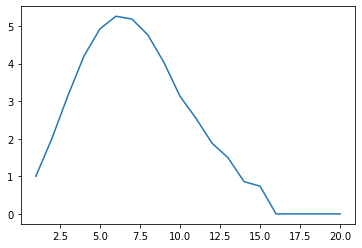

In [3]:
def openBallVolume(n, N = 10**4):
  points = np.random.uniform(-1,1,(n,N))
  lengths = la.norm(points, axis=0)
  num_within = np.count_nonzero(lengths < 1)
  volume = 2**n * (num_within / N)
  return volume

z = []
y = []
x = np.linspace(1,20,20)
sum = 0
for i in range(20):
  for j in range(len(x)):
    y += [openBallVolume(i)]
  z += [y]
  y = []
for i in range(20):
  for j in range(20):
    sum += z[i][j]
  z[i] = sum/20
  sum = 0
for i in range(20):
  print((x[i],z[i]))
plt.plot(x,z)
plt.show()

In [4]:
#The Volume of the unit sphere as n approaches infinity is 0 
#The Volume of the unit sphere is the highest at n=6

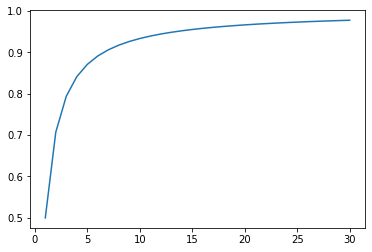

In [5]:
x = np.linspace(1,30,30)
y = 2**(-1/x)
plt.plot(x,y)
plt.show()

In [6]:
#A function to generate n points on a d-dimensional unit sphere
def generate(n, d):
  list_of_points = []
  point = []
  for i in range(n):
    point = []
    for j in range(d):
      point.append(random.uniform(-1,1))
    norm = np.sqrt(np.sum([s**2 for s in point]))
    norm_point = point/norm
    list_of_points.append(tuple(norm_point))
  return list_of_points

In [7]:
test_Points = generate(500,50)
pole_Points = generate(5,50)
band_Points = []
all_Points = 0
for i in range(len(pole_Points)):
  band_Points += [0]
  for j in range(len(test_Points)):
    if -50**-0.5 <= np.dot(pole_Points[i],test_Points[j]) <= 50**-0.5:
      band_Points[i] += 1
for i in range(len(test_Points)):
  for j in range(len(pole_Points)):
    if 50**-0.5 < np.dot(pole_Points[j],test_Points[i]) or np.dot(pole_Points[j],test_Points[i]) < -50**-0.5:
      break
    elif j == len(pole_Points) - 1:
      all_Points += 1
print(band_Points)
#This is how many points are within the band of each equator relative to the point
print(all_Points)
#This is how many points are within all of the bands

[314, 337, 359, 358, 346]
76


In [8]:
def Gauss_generate(n, d):
  list_of_points = []
  point = []
  for i in range(n):
    point = []
    for j in range(d):
      point.append(random.uniform(-1,1))
    list_of_points.append(tuple(point))
  return list_of_points

64


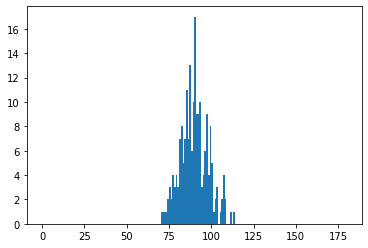

In [13]:
child_Points = Gauss_generate(200,50)
parent_Point = Gauss_generate(1,50)[0]
angles_List = []
parent_Norm = (np.dot(parent_Point,parent_Point))**0.5
for i in range(len(child_Points)):
  angles_List += [(180/np.pi)*math.acos(np.dot(parent_Point,child_Points[i])/(parent_Norm*np.dot(child_Points[i], child_Points[i])**0.5))]
ortho_Count = 0
for i in range(len(angles_List)):
  if 87 <= angles_List[i] <= 93:
    ortho_Count += 1
print(ortho_Count)
edges = np.linspace(0, 180, 181)
plt.hist(angles_List, edges)
plt.show()